In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH)

In [5]:
X_train.shape

(250000, 30)

In [6]:
from implementations import read_header
features = read_header(DATA_TRAIN_PATH)

In [17]:
positive_cols = [1, 2, 3, 8, 9, 10, 13, 16, 19, 21, 29]

In [18]:
np.log(X_train[positive_cols])

/var/folders/rs/c9bqjyq95q59ngc5v1t0gz_00000gn/T/ipykernel_9258/1695630036.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(X_train[positive_cols])
/var/folders/rs/c9bqjyq95q59ngc5v1t0gz_00000gn/T/ipykernel_9258/1695630036.py:1: RuntimeWarning: invalid value encountered in log
  np.log(X_train[positive_cols])


array([[ 5.08101298,  4.23073852,  4.63700794,  3.87423806,         nan,
                nan,         nan,  1.24501877,  0.73140589,  4.82956895,
        -0.12897038,  0.34642257,         nan,  3.7380029 ,  0.71245949,
                nan,  3.60869924, -0.69114918, -2.27302629,  3.80006298,
                nan,  5.10319017,  0.        ,  3.83354241, -0.32158362,
         0.14669438,         nan,         nan,         nan,  3.83354241],
       [        nan,  5.0886575 ,  4.83590882,  3.5733283 ,         nan,
                nan,         nan,  1.14676733,  2.23387789,  5.2873272 ,
         1.32866525,  0.34642257,         nan,  3.47053686,         nan,
                nan,  4.79916501,         nan,  0.05069311,  3.9942111 ,
                nan,  5.56227267,  0.        ,  3.78987797,  0.71930214,
                nan,         nan,         nan,         nan,  3.78987797],
       [ 4.96915336,  4.3995841 ,  4.3937452 , -0.88188931,         nan,
                nan,         nan,  1.19694819, -0

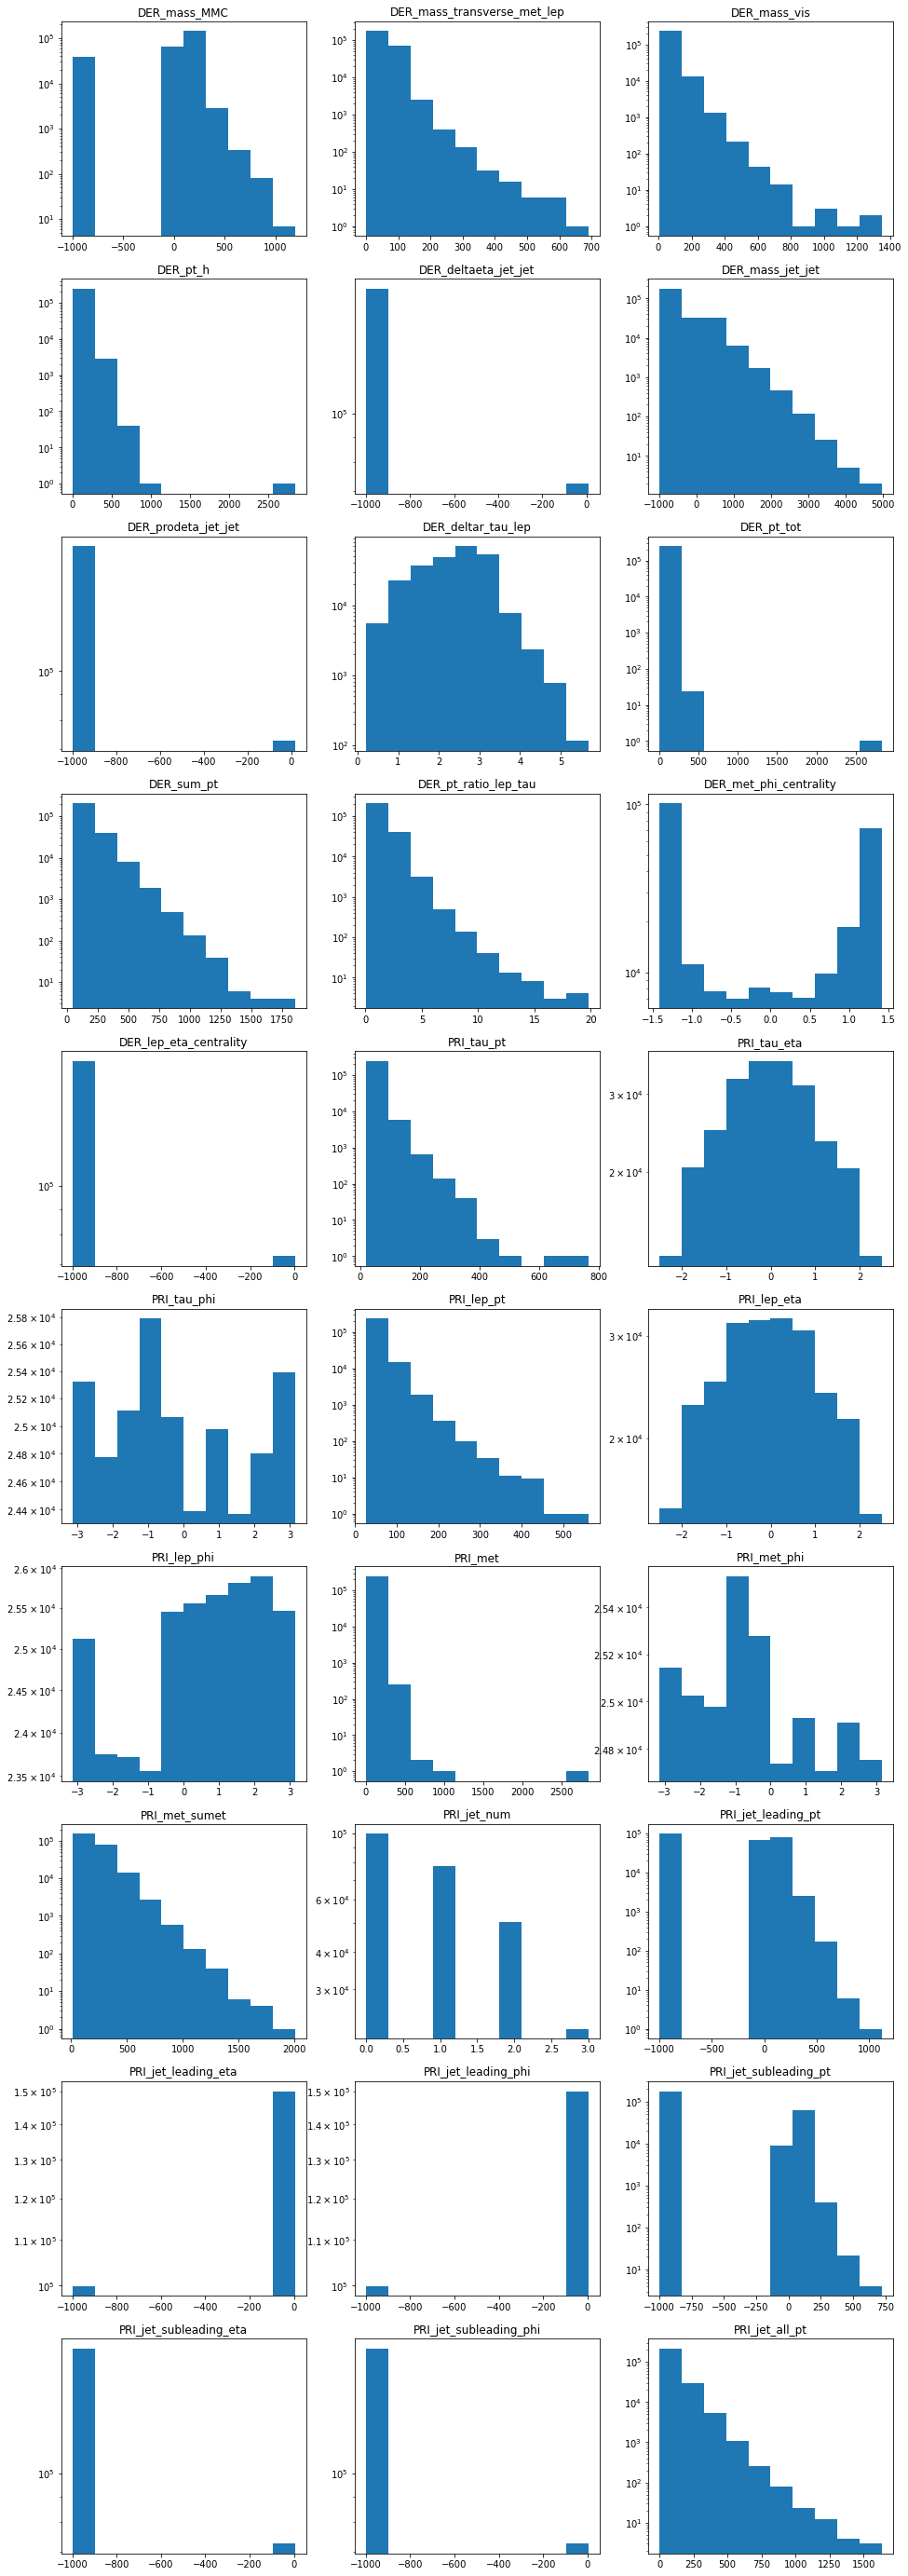

In [26]:
fig, axs = plt.subplots(10, 3, figsize=(16, 50))

for i in range(X_train.shape[1]):
    ax = axs[i//3, i%3]
    ax.hist(X_train[:, i])
    ax.set_yscale('log')
    ax.set_title(features[i])

plt.show()

In [8]:
derived_cols = list(range(13))
raw_cols = list(range(13, 30))

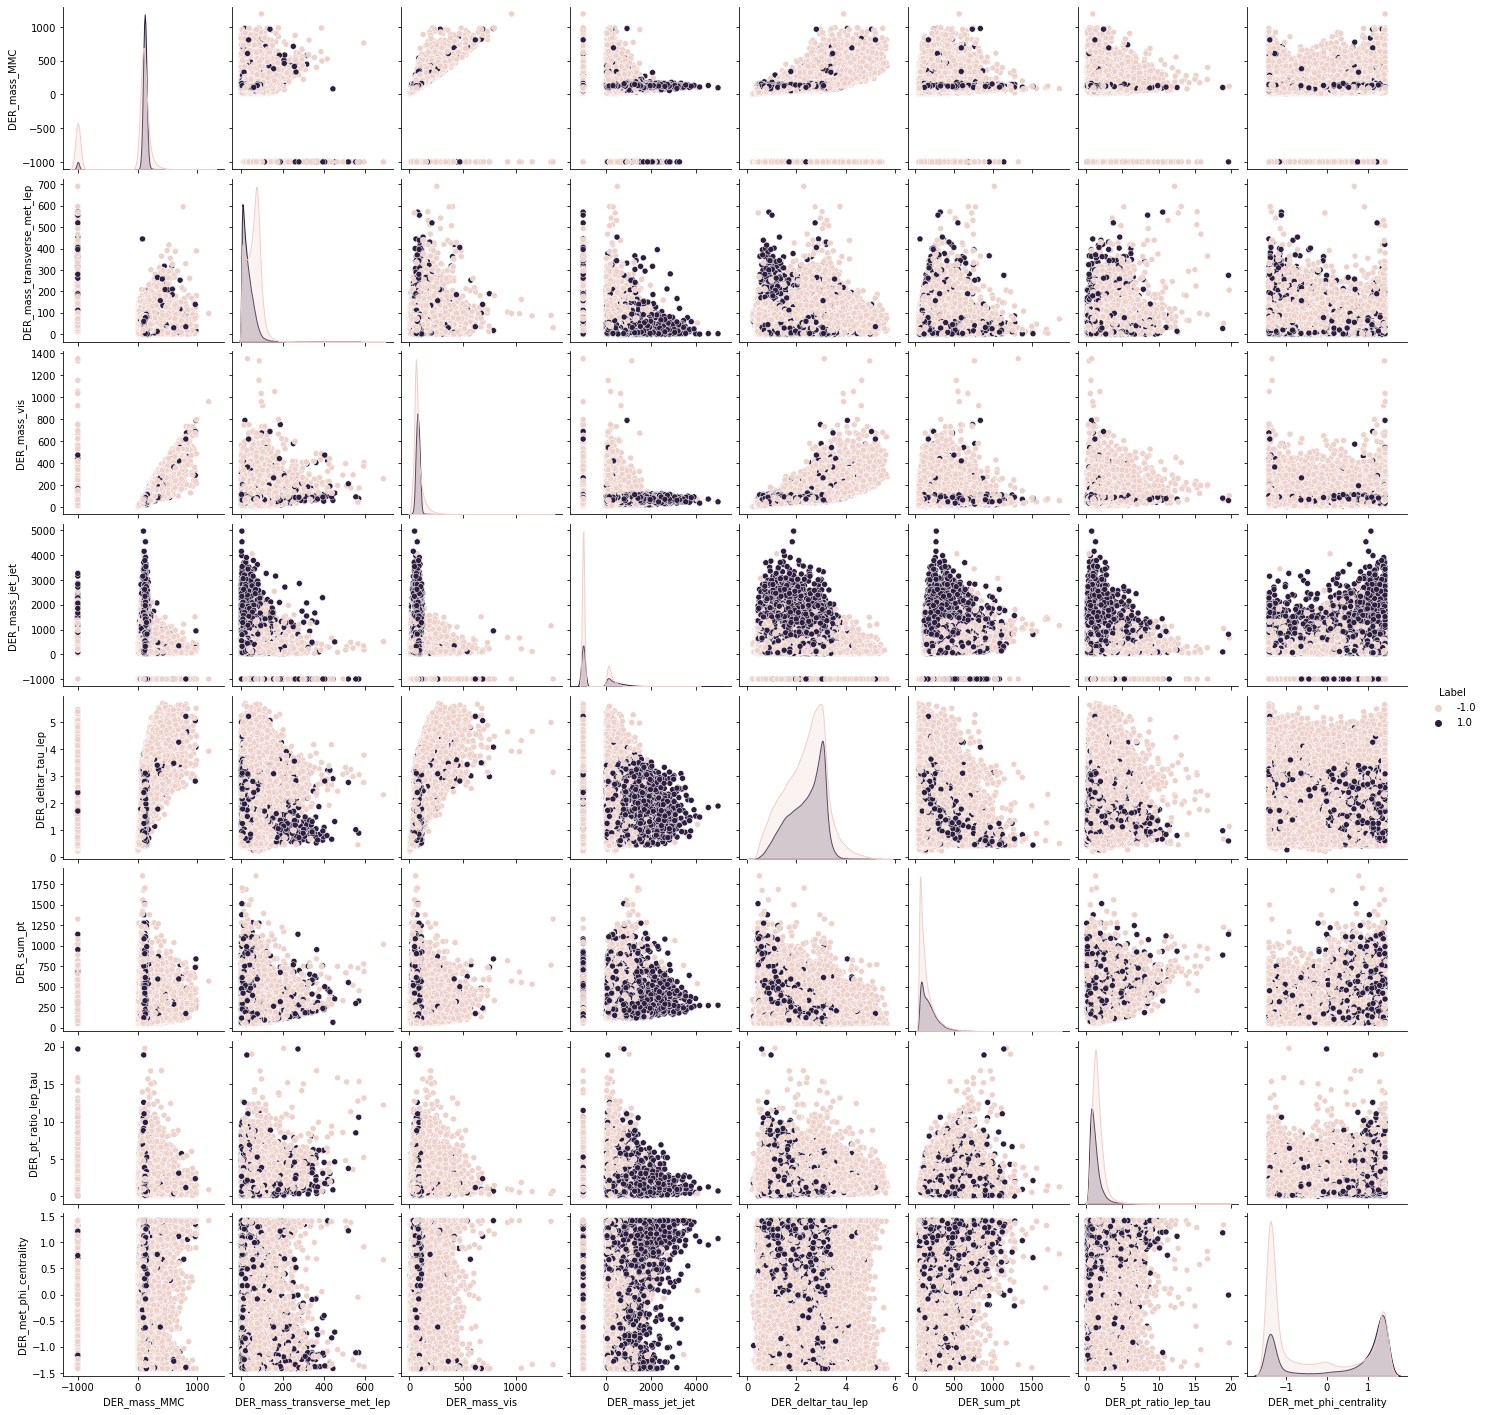

In [13]:
import seaborn as sns
import pandas as pd
int_cols = [0, 1, 2, 5, 7, 9, 10, 11]
sns.pairplot(pd.DataFrame(np.hstack([X_train[:, int_cols], y_train.reshape((-1, 1))]), columns=list(np.array(features).take(int_cols))+['Label']), hue='Label')

In [19]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [20]:
from implementations import preprocess
tX_train, ty_train, tX_test, ty_test, cont_cols = preprocess(X_train, y_train, X_test, encodable_threshold=0.3)

In [21]:
tX_train

array([[ 1.        ,  0.06833197,  0.40768027, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.55250482,  0.54013641, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  3.19515553,  1.09655998, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.31931645, -0.13086367, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.84532397, -0.30297338, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.66533608, -0.25352276, ...,  0.        ,
         0.        ,  0.        ]])

In [5]:
tX_train.shape, tX_test.shape

((250000, 34), (568238, 34))

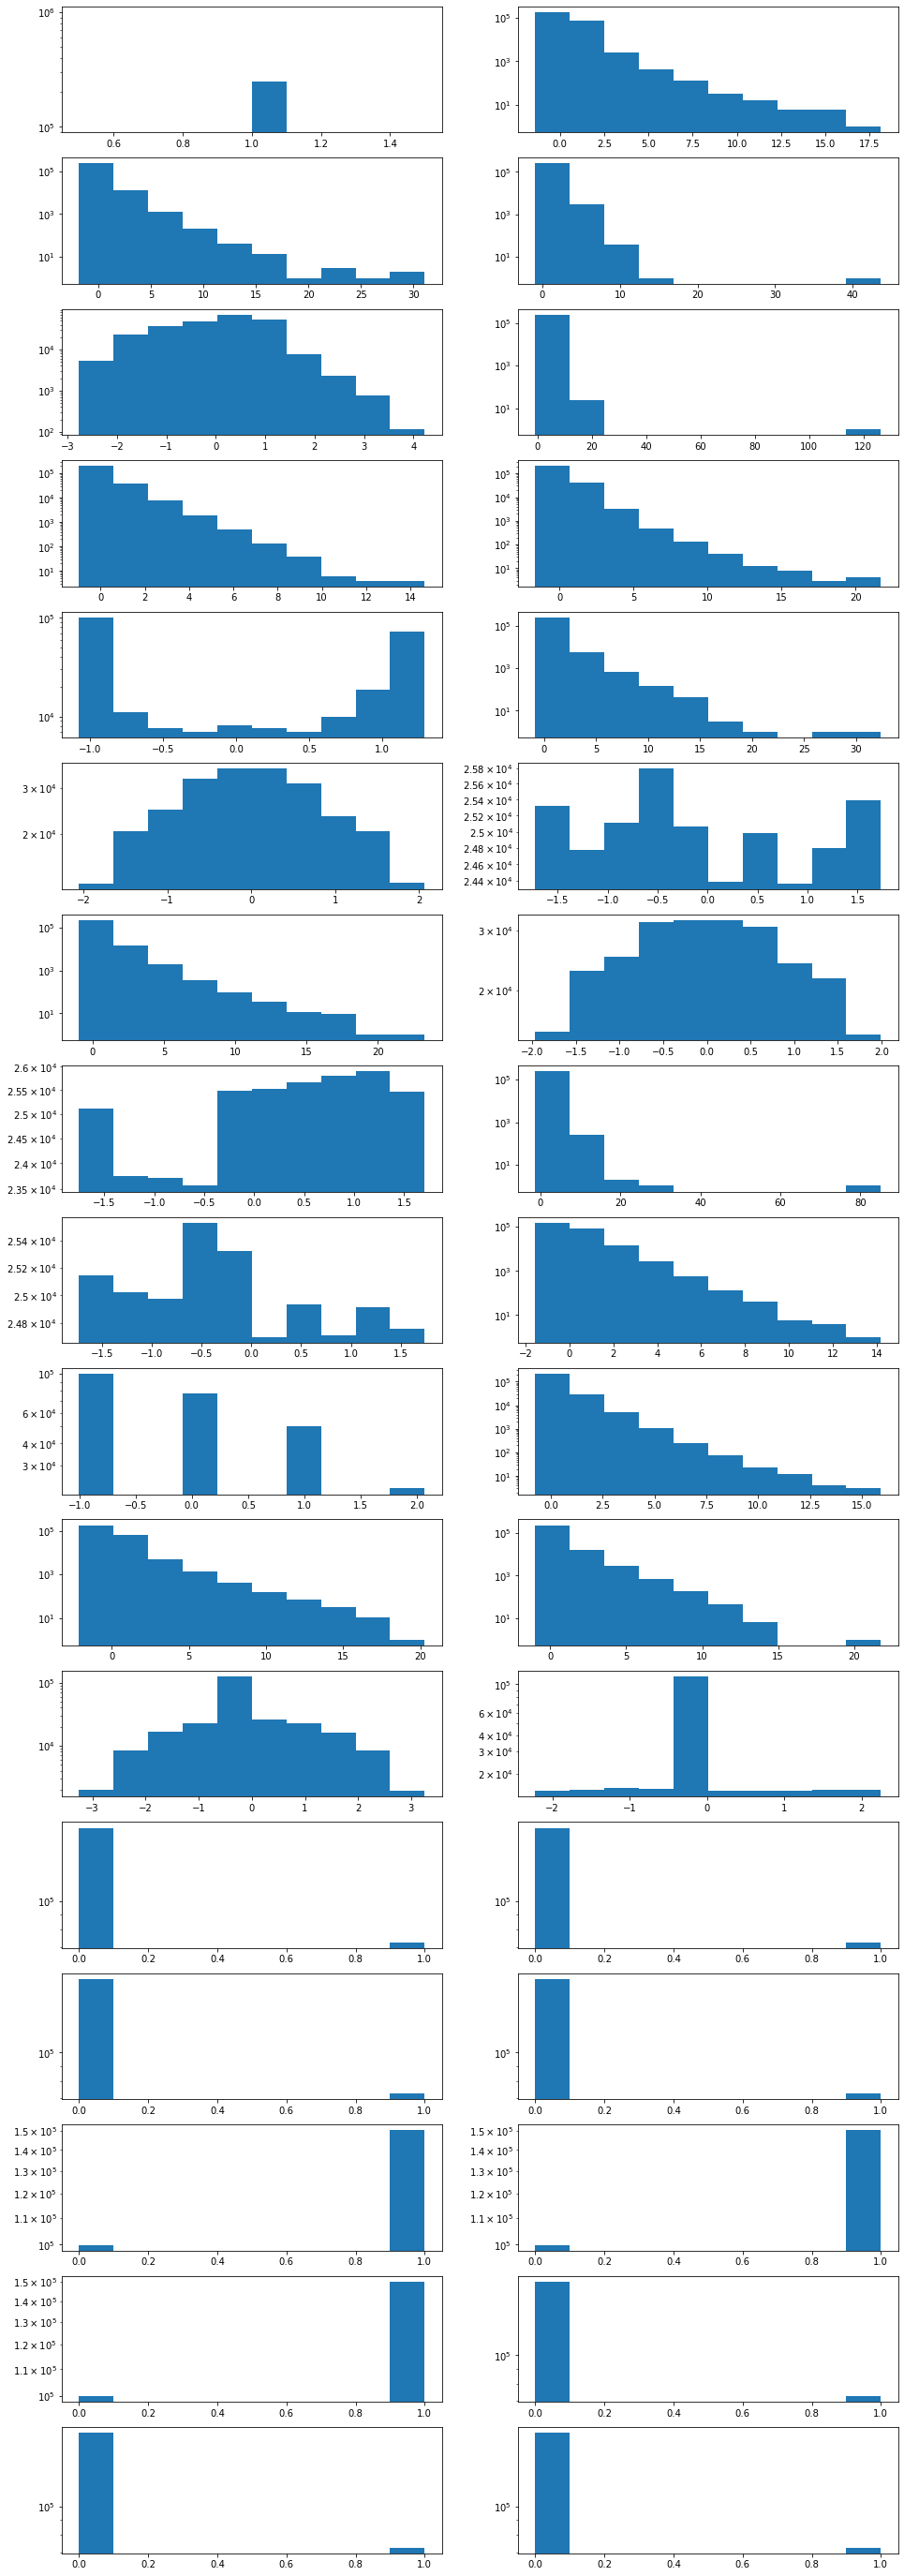

In [23]:
fig, axs = plt.subplots(17, 2, figsize=(16, 50))

for i in range(tX_train.shape[1]):
    ax = axs[i//2, i%2]
    ax.hist(tX_train[:, i])
    ax.set_yscale('log')
    # ax.set_title(features[i])

plt.show()

In [29]:
skewed_cols = [1,2,3,6,7,9,12,17,19,20,21]
binned_cols = []
for c in skewed_cols:
    bins = np.linspace(np.min(tX_train[:, c]), np.max(tX_train[:, c]), 10)
    digitized_col = np.digitize(tX_train[:, c], bins)
    binned_cols.append(digitized_col.reshape((-1, 1)))

In [32]:
binned_X = np.hstack(binned_cols)

In [33]:
tX_train = np.hstack([tX_train, binned_X])

In [35]:
tX_train.shape

(250000, 45)

In [40]:
from implementations import logistic_regression_cv
weights, loss, lambda_, degree, accuracy, f1 = logistic_regression_cv(ty_train, tX_train, cont_cols=cont_cols, verbose=False)

Best Accuracy : 71.3685% reached at epoch 99
Best Accuracy : 71.11800000000001% reached at epoch 99
Best Accuracy : 70.49499999999999% reached at epoch 99
Best Accuracy : 71.662% reached at epoch 99
Best Accuracy : 69.922% reached at epoch 99
Best Accuracy : 72.0095% reached at epoch 99
Best Accuracy : 70.56949999999999% reached at epoch 99
Best Accuracy : 71.816% reached at epoch 99
Best Accuracy : 71.58250000000001% reached at epoch 99
Best Accuracy : 71.456% reached at epoch 99
Best Accuracy : 69.896% reached at epoch 99
Best Accuracy : 71.316% reached at epoch 99
Best Accuracy : 69.51899999999999% reached at epoch 99
Best Accuracy : 71.119% reached at epoch 99
Best Accuracy : 70.487% reached at epoch 99
Best Accuracy : 71.7565% reached at epoch 81
Best Accuracy : 71.1895% reached at epoch 99
Best Accuracy : 71.143% reached at epoch 98
Best Accuracy : 71.185% reached at epoch 99
Best Accuracy : 71.5565% reached at epoch 69
Best Accuracy : 69.45599999999999% reached at epoch 45
Best 

In [41]:
weights, loss, lambda_, degree, accuracy, f1

(array([[ 0.24183977],
        [-0.26544805],
        [ 0.37138584],
        [ 0.30515328],
        [ 0.91327956],
        [ 0.17158336],
        [ 0.53986589],
        [-0.36120854],
        [ 0.19929079],
        [ 0.35773507],
        [-0.06072972],
        [ 0.29187704],
        [ 0.12951111],
        [ 0.11767485],
        [ 0.33113117],
        [ 0.20211105],
        [ 0.23329362],
        [-0.09106707],
        [ 0.21601779],
        [-0.04322265],
        [-0.05206696],
        [ 0.23535913],
        [ 0.1280109 ],
        [ 0.27909552],
        [-0.22777135],
        [ 0.03490579],
        [-0.60286866],
        [ 0.16207475],
        [-0.32180454],
        [-0.01908622],
        [-0.02063272],
        [-0.01574469],
        [ 0.31183612],
        [-0.03238049],
        [-0.04039736],
        [ 0.07057688],
        [ 0.02495367],
        [-0.17392018],
        [ 0.02440933],
        [-0.00554544],
        [-0.10049804],
        [-0.03536644],
        [-0.26242361],
        [-0

Iteration 0/1000
Accuracy = 34.266799999999996%
Loss = 7.512752747308656


Iteration 10/1000
Accuracy = 57.414%
Loss = 1.3267212383098728


Iteration 20/1000
Accuracy = 65.9532%
Loss = 0.7310928001903751


Iteration 30/1000
Accuracy = 69.5332%
Loss = 0.605709180975117


Iteration 40/1000
Accuracy = 72.36359999999999%
Loss = 0.5472410645509806


Iteration 50/1000
Accuracy = 74.422%
Loss = 0.5174312370894415


Iteration 60/1000
Accuracy = 75.69839999999999%
Loss = 0.5021529876141859


Iteration 70/1000
Accuracy = 76.472%
Loss = 0.49377191008399235


Iteration 80/1000
Accuracy = 76.92999999999999%
Loss = 0.48894913573336474


Iteration 90/1000
Accuracy = 77.216%
Loss = 0.48605760412051635


Iteration 100/1000
Accuracy = 77.3864%
Loss = 0.4842656778429128


Iteration 110/1000
Accuracy = 77.4828%
Loss = 0.4831340905769937


Iteration 120/1000
Accuracy = 77.58040000000001%
Loss = 0.4824060934123485


Iteration 130/1000
Accuracy = 77.6628%
Loss = 0.48192887450566024


Iteration 140/1000
Accur

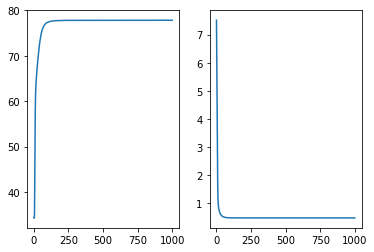

In [39]:
from implementations import logistic_regression, build_poly
tX_train_poly = build_poly(tX_train, degree=2, cont_cols=cont_cols)
loss, weights = logistic_regression(ty_train, tX_train_poly, max_iters=1000, lambda_=0.05, verbose=True)

In [299]:
tX_test.shape

(568238, 34)

In [300]:
from implementations import build_poly
tX_test = build_poly(tX_test, degree, cont_cols)

In [301]:
tX_test.shape

(568238, 48)

In [302]:
from datetime import datetime
from implementations import predict
method = 'logistic_regression'
time = datetime.now().strftime('%Y%m%dH%H%M%S')
OUTPUT_PATH = f'submissions/submission_{method}_{time}' # TODO: fill in desired name of output file for submission
y_pred = predict(weights, tX_test)
y_pred[np.where(y_pred == 0)] = -1
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [5]:
corrs = []
for i in range(X_train.shape[1]):
    corrs.append(np.corrcoef(X_train[:, i].reshape((-1, 1)), y_train.reshape((-1, 1)))[0, 1])

In [ ]:
corrs

Error: Kernel is dead

In [ ]:
sorted(corrs)

Error: Session cannot generate requests